In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt

# 학습 내용
- KNN 개념 복습 + sklearn KNN 모듈 사용 방법 소개
- KNN을 이용한 연습문제 수행

# KNN
- classification, regression에서 모두 사용 가능하지만 classification 문제에서 더 많이 쓰임
- predictors가 너무 많으면 차원의 저주로 인해 잘 작동하기 어렵고, predictors 대비 training data가 많을 때 매우 높은 정확도를 보임
- 특정 모양의 모델을 만드는 것이 아니라 데이터끼리 직접 비교를 하기 때문에 그만큼 많은 메모리와 연산량이 필요함

분명 KNN이 잘 작동하는 경우가 존재하나, 특징만으로 생각해봤을 때는 다른 classification 알고리즘들의 활용도가 더 높음

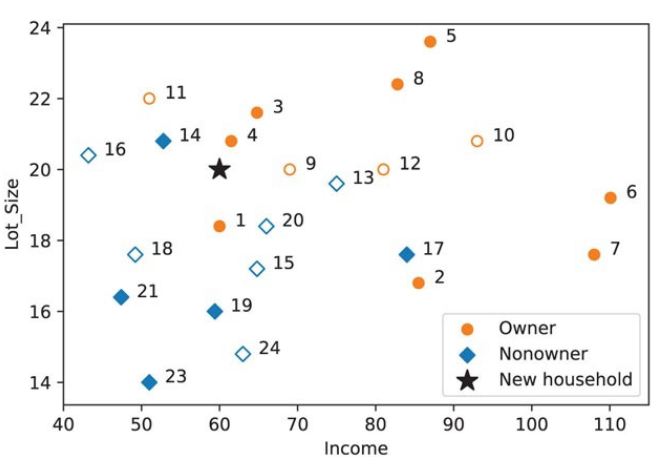

## Data

##### Data import

In [2]:
# 학습에 사용할 데이터
mower_df = pd.read_csv('./data/RidingMowers.csv')
print(mower_df.shape)
mower_df.head()

(24, 3)


,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [3]:
# KNN을 이용하여 ownership을 예측하고자 하는 데이터
newHousehold = pd.DataFrame([{'Income': 60, 'Lot_Size': 20}])
newHousehold

,Income,Lot_Size
0,60,20


##### Income을 x축, Lot_Size를 y축으로 scatter plot을 그려 데이터를 파악해보시오. (plotting 연습)
- Owner, Nonowner의 색, 모양을 다르게 하여 plotting
- ownership을 예측하고자 하는 데이터인 newHoushold의 데이터도 색, 모양을 다르게 하여 plotting

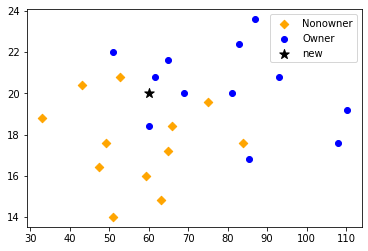

In [5]:
groups = mower_df.groupby("Ownership")
color = {"Owner": "blue", "Nonowner": "orange"}
marker = {"Owner": "o", "Nonowner": "D"}

for name, group in groups:
    plt.scatter(group.Income, group.Lot_Size, c=color[name], 
                marker=marker[name], label=name)
plt.scatter(newHousehold.Income, newHousehold.Lot_Size, 
            c="k", marker="*", s=100, label="new")
plt.legend()

주변 점들이 뭔지 살펴보면 주로 Owner로 보임, x축, y축 scale을 보면 크게 차이나는 정도는 아니지만 normalize를 해주는 것이 좋을 것으로 보임

## KNN 학습

### Preprosessing

##### 데이터를 training set : validation set = 60 : 40 으로 분리하시오. (random_state=26으로 설정)

In [6]:
train_X, valid_X, train_y, valid_y = train_test_split(mower_df[["Income", "Lot_Size"]], 
                                                      mower_df["Ownership"], test_size=0.4, random_state=26)
print(train_X.shape, valid_X.shape, train_y.shape, valid_y.shape)

(14, 2) (10, 2) (14,) (10,)


##### data를 standardize하기 위한 규칙을 학습하시오 .

In [7]:
scaler = preprocessing.StandardScaler()
scaler.fit(train_X)

StandardScaler()

##### data를 standardize하시오.

In [8]:
train_X_norm = scaler.transform(train_X)
valid_X_norm = scaler.transform(valid_X)

In [10]:
# training data
trainData_norm = pd.concat([pd.DataFrame(train_X_norm, columns=["zIncome", "zLot_Size"]), 
                            train_y.reset_index(drop=True)], axis=1)
trainData_norm

,zIncome,zLot_Size,Ownership
0,1.797760,0.131181,Owner
1,-0.409776,0.743358,Owner
2,0.557724,1.355535,Owner
3,-1.050235,-0.940129,Nonowner
4,-0.505164,-1.093174,Nonowner
5,-0.259882,1.049447,Owner
6,0.748499,1.814668,Owner
7,-0.477910,-0.174908,Owner
8,-0.804953,0.743358,Nonowner
9,-0.886713,-1.858395,Nonowner


In [11]:
# validation data
validData_norm = pd.concat([pd.DataFrame(valid_X_norm, columns=["zIncome", "zLot_Size"]), 
                            valid_y.reset_index(drop=True)], axis=1)
validData_norm

,zIncome,zLot_Size,Ownership
0,0.203428,0.284225,Nonowner
1,-0.259882,-0.634041,Nonowner
2,0.475964,0.437269,Owner
3,-0.069107,0.437269,Owner
4,-1.241009,0.590314,Nonowner
5,-0.886713,1.202491,Owner
6,-0.968474,-0.480996,Nonowner
7,-0.205375,-0.174908,Nonowner
8,-0.341643,-1.552307,Nonowner
9,1.021034,0.743358,Owner


In [12]:
# new data
newHouseholdNorm = pd.DataFrame(scaler.transform(newHousehold), columns=['zIncome', 'zLot_Size'])
newHouseholdNorm

,zIncome,zLot_Size
0,-0.47791,0.437269


### Explore sklearn KNN
주요 method: fit, predict, kneighbors

##### sklearn KNN 모듈 import

In [14]:
from sklearn.neighbors import KNeighborsClassifier

##### training set을 이용하여 KNN모델을 학습하시오. (n_neighbors=3) 

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X_norm, train_y)

KNeighborsClassifier(n_neighbors=3)

##### 학습한 모델을 이용하여 예측하고자 하는 데이터(newHousholdNorm)와 가장 가까운 점 3개를 출력해보시오.

In [17]:
distances, indices = knn.kneighbors(newHouseholdNorm)

In [19]:
indices

array([[1, 8, 7]])

In [21]:
distances

array([[0.31358009, 0.44793643, 0.61217726]])

In [20]:
distances, indices = knn.kneighbors(newHouseholdNorm)
print(trainData_norm.iloc[indices[0], :]) # indices is a list of lists, we are only interested in the first element

    zIncome  zLot_Size Ownership
1 -0.409776   0.743358     Owner
8 -0.804953   0.743358  Nonowner
7 -0.477910  -0.174908     Owner


##### 학습한 모델을 이용하여 training set에서의 accuracy와 validation set에서의 accuracy를 평가해보시오.

In [22]:
print("train accuracy: ", accuracy_score(train_y, knn.predict(train_X_norm)))
print("valid accuracy: ", accuracy_score(valid_y, knn.predict(valid_X_norm)))

train accuracy:  0.8571428571428571
valid accuracy:  0.8


##### 이 때에 예측하고자 하는 점의 Ownership은 무엇인지 구하시오.

In [23]:
knn.predict(newHouseholdNorm)

array(['Owner'], dtype=object)

##### nearest neighbors 개수를 1~14까지 변화시켜가며 KNN의 성능 변화를 살펴보고, 몇 개를 이용할 때 효율적인 KNN classifier가 될지 생각해보시오.

In [24]:
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X_norm, train_y)
    results.append({"k": k, 
                    "accuracy": accuracy_score(valid_y, knn.predict(valid_X_norm))})

In [26]:
# 결과 dataframe으로 표현
results = pd.DataFrame(results)
results

,k,accuracy
0,1,0.6
1,2,0.7
2,3,0.8
3,4,0.9
4,5,0.7
5,6,0.9
6,7,0.9
7,8,0.9
8,9,0.9
9,10,0.8


<AxesSubplot:xlabel='k'>

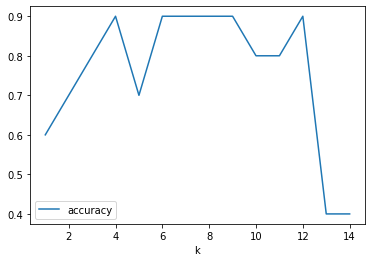

In [27]:
# 결과 plotting
results.plot(x='k', y="accuracy")

k=4일 때 효과적인 것으로 보임

# Exercise
종양의 특성을 바탕으로 악성 종양 여부를 예측하는 KNN 모델을 만들어보시오.

##### Data
- 첫 열 ~ 마지막에 두 번째 열이 predictor variable, 마지막 열인 target이 target variable

In [28]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()
df_data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df_labels = pd.DataFrame(breast_cancer_data.target, columns=['target'])['target'].map({0: "malignant", 1: "benign"})
df = pd.concat([df_data, df_labels], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [29]:
df.shape

(569, 31)

##### preprocessing 순서 생각해보기.
- ...
- ...

##### Q5) training : valid = 80 : 20 으로 분리하시오.

In [30]:
X = df.iloc[:, :-1]
y = df.target
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, 
                                                      random_state=100)

print(train_X.shape, train_y.shape)
print(valid_X.shape, valid_y.shape)

(455, 30) (455,)
(114, 30) (114,)


##### Q5) standardize rule을 학습하시오.

In [31]:
scaler = preprocessing.StandardScaler()
scaler.fit(train_X)

StandardScaler()

##### Q6) standardize를 하시오.

In [32]:
scaler = preprocessing.StandardScaler()
scaler.fit(train_X)
train_X_norm = scaler.transform(train_X)
valid_X_norm = scaler.transform(valid_X)

In [32]:
scaler = preprocessing.StandardScaler()
train_X_norm = scaler.fit_transform(train_X)
valid_X_norm = scaler.transform(valid_X)

##### KNN 모델 학습을 어떻게 했는지 생각해보기.
- ...
- ...

##### Q7) train_X_norm, train_y를 이용하여 n_neighbors를 1~100까지 바꿔가며 KNN 모델을 학습하고 평가하시오.

In [37]:
accuracy_list

array([0.96491228, 0.96491228, 0.96491228, 0.95614035, 0.94736842,
       0.95614035, 0.95614035, 0.96491228, 0.97368421, 0.95614035,
       0.94736842, 0.95614035, 0.95614035, 0.95614035, 0.95614035,
       0.95614035, 0.95614035, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.94736842, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.93859649, 0.93859649, 0.93859649, 0.93859

In [36]:
np.argmax(accuracy_list)

8

9


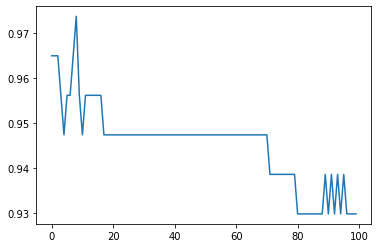

In [34]:
accuracy_list = np.array([])

for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X_norm, train_y)
    accuracy_list = np.append(accuracy_list, 
                              accuracy_score(valid_y, knn.predict(valid_X_norm)))

best_k = np.argmax(accuracy_list)+1
print(best_k)
plt.plot(accuracy_list)

##### 참고: knn의 경우 score 함수를 이용해 바로 accuracy 값을 얻을 수도 있다.

In [35]:
knn = KNeighborsClassifier(best_k)
knn.fit(train_X_norm, train_y)
print(knn.score(train_X_norm, train_y))
print(knn.score(valid_X_norm, valid_y))

0.9714285714285714
0.9736842105263158
